# London Crime 2008 - 2016 Dataset Visualization

**Nama Anggota**:
1. Khansa Afifah
2. Ulfa Afilia Shofa

**About Dataset**

Crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

**Business Questions**

1. Trend jumlah crime keseluruhan tiap tahun
   1a. Kenapa di tahun 2014 tindak kejahatannya sangat rendah? Borough/Major category apa yang berkontribusi paling besar terhadap penurunan tersebut?
2. Borough dengan jumlah crime tertinggi
   2a. kenapa di westminster jumlah kejahatan paling tinggi? terutama theft handling
   2b. theft and handling paling banyak di borough mana?
3. Major category & minor category jumlah crime terbanyak?
4. Major category terbanyak tsb terjadi di borough mana dan tahun berapa?
5. Adakah korelasi antara banyaknya kantor polisi dengan total tindak kejahatan?

# Preparation

## Prepare API Kaggle

In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download -d jboysen/london-crime

 86% 105M/121M [00:00<00:00, 163MB/s] 
100% 121M/121M [00:00<00:00, 149MB/s]


In [ ]:
!unzip -q '/content/london-crime.zip' -d dataset

## Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from wordcloud import WordCloud


df = pd.read_csv("/content/dataset/london_crime_by_lsoa.csv")
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [ ]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [ ]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))
df['date']

0          2016-11-01
1          2016-11-01
2          2015-05-01
3          2016-03-01
4          2008-06-01
              ...    
13490599   2015-02-01
13490600   2015-06-01
13490601   2011-02-01
13490602   2011-05-01
13490603   2015-06-01
Name: date, Length: 13490604, dtype: datetime64[ns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   lsoa_code       object        
 1   borough         object        
 2   major_category  object        
 3   minor_category  object        
 4   value           int64         
 5   year            int64         
 6   month           int64         
 7   date            datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 823.4+ MB


In [ ]:
# cek missing value
df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
date              0
dtype: int64

In [ ]:
# sudah tidak ada missing value
df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
date              0
dtype: int64

In [ ]:
# cek duplicate
df.duplicated().sum()

0

# EDA

## 1 - Melihat trend secara keseluruhan

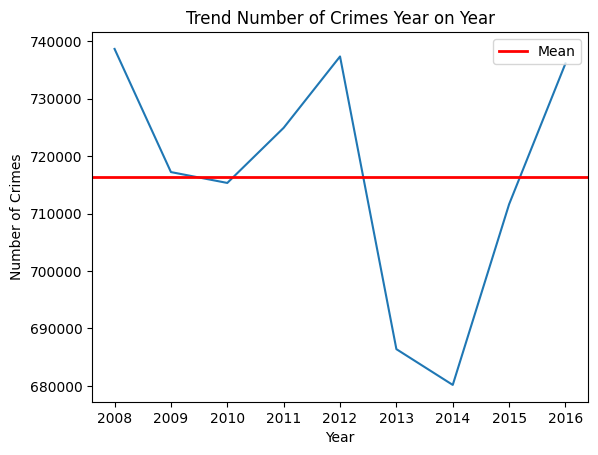

In [ ]:
# 1
df1 = pd.DataFrame(df.groupby(["year"], sort = True)["value"].sum())
df1

plt.plot(df1.index, df1.value)
plt.title("Trend Number of Crimes Year on Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")


plt.axhline(
    np.mean(df1.value),
    color='r',
    linestyle='-',
    linewidth=2,
    label='Mean'
)

legend = plt.legend(loc='upper right')
plt.show()

Dapat kita lihat terdapat seasonal trend dimana setiap 4 tahun angka kejahatan meningkat

### 1a - Melihat Distribusi Data

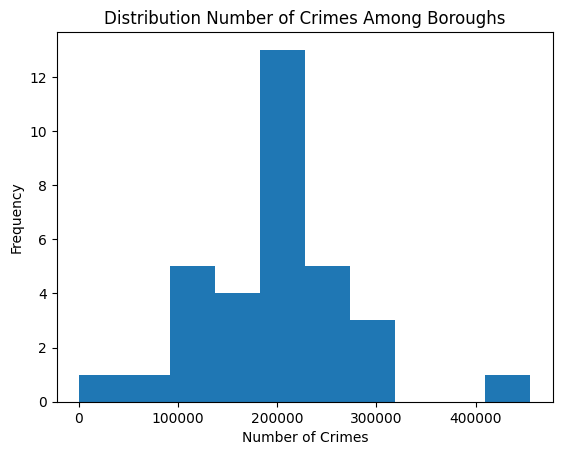

In [ ]:
df1a = pd.DataFrame(df.groupby(["borough"], sort = True)["value"].sum())
df1a.reset_index(inplace=True)
plt.hist(df1a['value'], bins = 10)
plt.xlabel('Number of Crimes')
plt.ylabel('Frequency')
plt.title('Distribution Number of Crimes Among Boroughs')
plt.show()

Berdasarkan boxplot Distribution Number of Crimes Among Boroughs, terlihat ada 1 daerah yang memiliki angka kejahatan paling besar yaitu lebih dari 400000. Daerah tersebut yaitu Westminster yang memang terkenal sebagai daerah paling berbahaya di London berdasarkan informasi dari internet. Sedangkan ada sebagian daerah yang memiliki angka kejatahan yang rendah, yaitu dibawah 100000. Selain itu, sebagian besar daerah di London memiliki angka kejahatan sekitar 200000.

In [ ]:
df1a.sort_values(by = 'value')

,borough,value
6,City of London,780
20,Kingston upon Thames,89306
26,Richmond upon Thames,96771
28,Sutton,100987
2,Bexley,114136
23,Merton,115654
14,Harrow,116848
15,Havering,138947
0,Barking and Dagenham,149447
19,Kensington and Chelsea,171981


### 1b - Memeriksa Pencilan

Dari histogram di atas tampaknya Westminster termasuk data outlier atau pencilan karena memiliki nilai yang sangat jauh dari rata-rata data. Maka akan coba kita perjelas lagi menggunakan boxplot

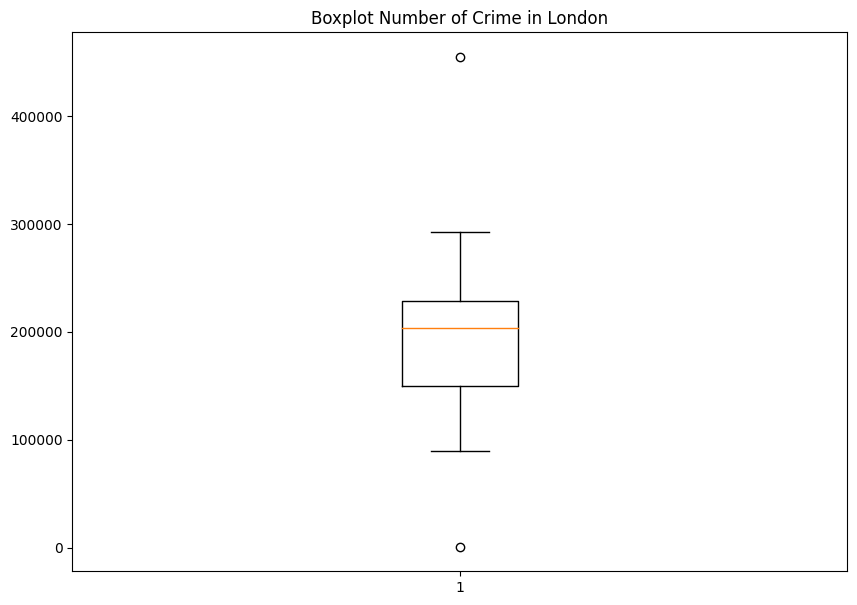

In [ ]:
df1b = df1a['value'].copy()
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df1b)
plt.title("Boxplot Number of Crime in London")
plt.show()

Dengan menggunakan boxplot ternyata terlihat ada dua outlier yaitu yang jumlah kejahatannya di atas 400000 dengan yang jumlah kejahatannya di bawah 100000. Apabila kita cek pada data kita, maka dua outlier itu adalah Westminster dengan angka kejahatan 455028 dan City of London dengan angka kejahatan 780, angka yang sangat kecil dibanding wilayah lain

**Follow up question** : Borough mana saja yang memiliki tingkat kejahatan tertinggi selain Westminster? Apa yang menyebabkan di tahun 2014 terjadi penurunan jumlah kejahatan?

## 2 - Melihat Top 10 Borough berdasarkan Jumlah Kejahatan

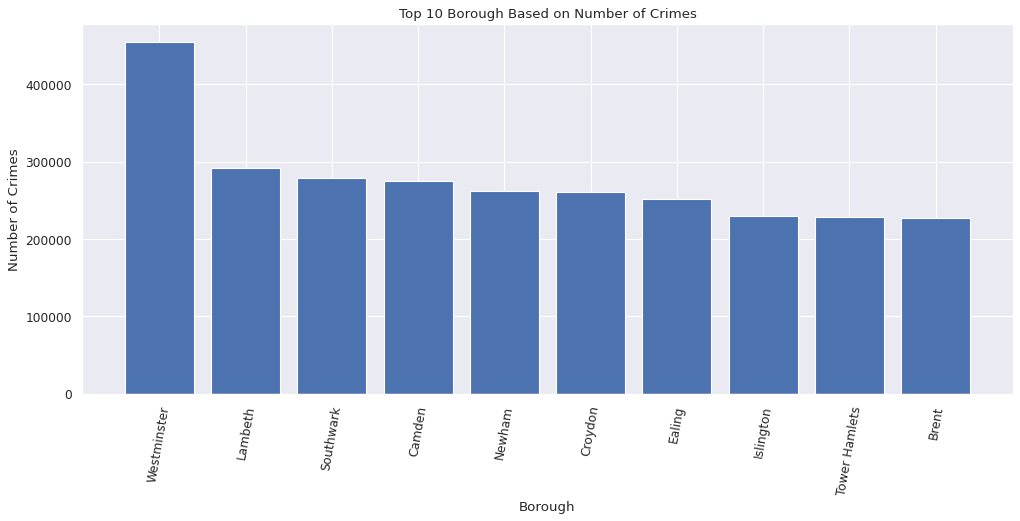

In [ ]:
# 2
df2 = pd.DataFrame(df.groupby(["borough"], sort = True)["value"].sum())
df2.sort_values(by = 'value', ascending=False, inplace=True)
df2.head()

from matplotlib.pyplot import figure

df2_viz = df2.head(10)
figure(figsize=(15, 6), dpi=80)
plt.bar(df2_viz.index, df2_viz.value)
plt.xlabel("Borough")
plt.ylabel("Number of Crimes")
plt.title("Top 10 Borough Based on Number of Crimes")
plt.xticks(rotation = 80)
plt.show()

### 2a - Melihat Top 5 Major Category di Westminster

In [ ]:
# 2a
df_westminster = df[df.borough == 'Westminster']
df2a = pd.DataFrame(df_westminster.groupby(["major_category"], sort = True)["value"].sum())
df2a.sort_values(by = 'value', ascending = False, inplace = True)
df2a.head()

,value
major_category,
Theft and Handling,277617
Violence Against the Person,71448
Drugs,34031
Burglary,29295
Criminal Damage,20405


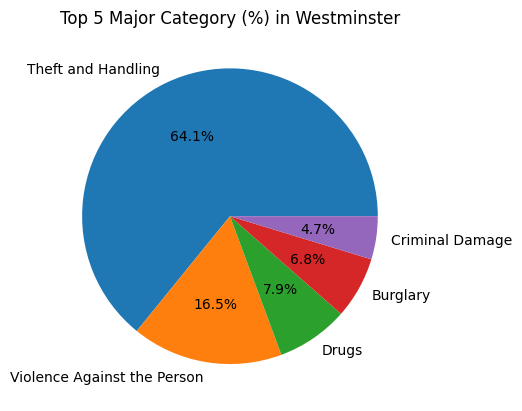

In [ ]:
plt.pie(df2a.head().value, labels=df2a.head().index, autopct='%1.1f%%')
plt.title('Top 5 Major Category (%) in Westminster')
plt.show()

Kategori kejahatan paling banyak di Westminster adalah Theft and Handling sebesar 64% dari 5 kategori kejahatan tertinggi

### 2b - Melihat Trend Jumlah Kejahatan di Top 5 Borough

In [ ]:
df2_sum = pd.DataFrame(df.groupby(["borough"], sort = True)["value"].sum())
df2_sum.sort_values(by = 'value', ascending = False, inplace = True)
df2_sum.head(10)

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024
Croydon,260294
Ealing,251562
Islington,230286
Tower Hamlets,228613


In [ ]:
top10 = list(df2_sum.head(10).index) # mencari top 10 borough berdasarkan jumlah crime nya
top10

['Westminster',
 'Lambeth',
 'Southwark',
 'Camden',
 'Newham',
 'Croydon',
 'Ealing',
 'Islington',
 'Tower Hamlets',
 'Brent']

In [ ]:
top5 = list(df2_sum.head(5).index) # mencari top 5 borough berdasarkan jumlah crime nya
top5

['Westminster', 'Lambeth', 'Southwark', 'Camden', 'Newham']

In [ ]:
df2b = pd.DataFrame(df.groupby(["year","borough"], sort = True)["value"].sum())
df2b

value
year borough                    
2008 Barking and Dagenham  17656
     Barnet                23944
     Bexley                15305
     Brent                 23504
     Bromley               24015
...                          ...
2016 Sutton                10658
     Tower Hamlets         29253
     Waltham Forest        20716
     Wandsworth            23679
     Westminster           48330

[297 rows x 1 columns]

In [ ]:
df2b.reset_index(inplace=True)

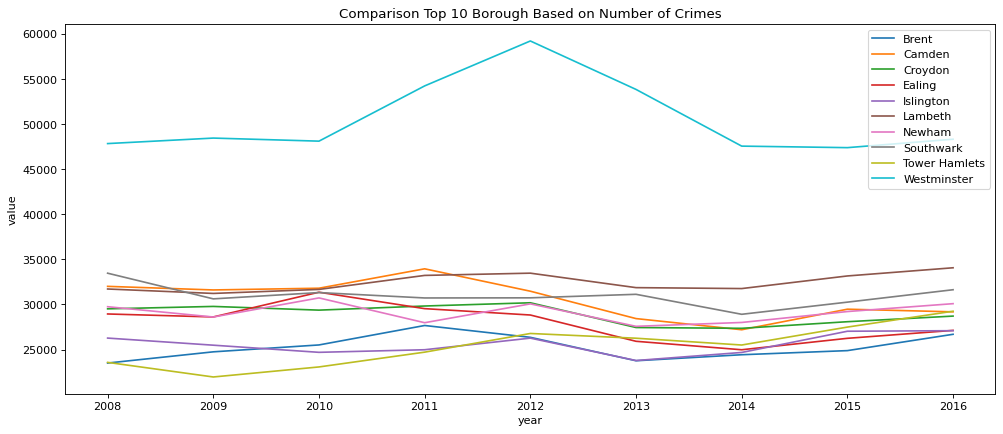

In [ ]:
figure(figsize=(15, 6), dpi=80)
df2b_viz = df2b.query('borough in @top10')
sns.lineplot(data=df2b_viz, x='year', y='value', hue='borough', errorbar=None)
plt.legend(loc = 'best')
plt.title("Comparison Top 10 Borough Based on Number of Crimes")
plt.show()

Karena kurang kelihatan trend antar garisnya, kita coba hanya tampilkan top 5 saja

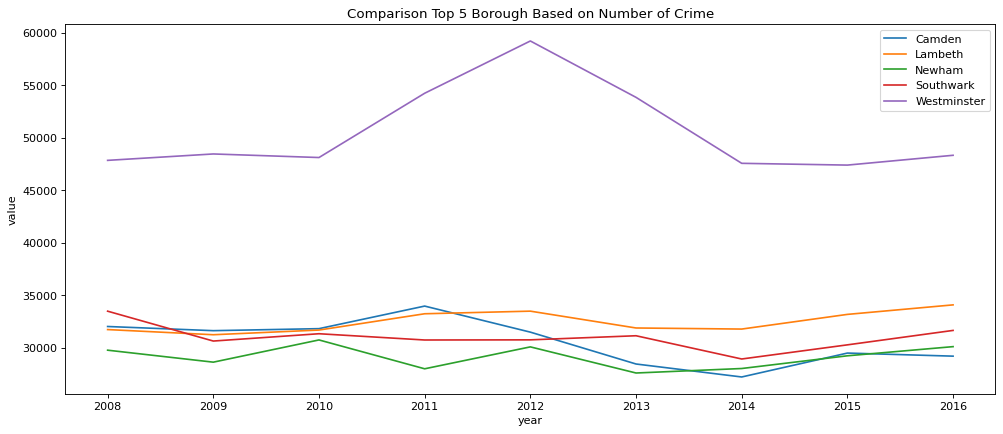

In [ ]:
figure(figsize=(15, 6), dpi=80)
df2b_viz = df2b.query('borough in @top5')
sns.lineplot(data=df2b_viz, x='year', y='value', hue='borough', errorbar=None)
plt.legend(loc = 'best')
plt.title("Comparison Top 5 Borough Based on Number of Crime")
plt.show()

Dari grafik di atas, bisa kita lihat bahwa Westminster mendominasi jumlah tingkat kejahatan dengan angka tertinggi dibanding wilayah lainnya. Lambeth menjadi wilayah kedua tertinggi tiap tahunnya setelah Westminster.

Ada beberapa hal yang menarik di sini yaitu di wilayah Newham terjadi seasonal trend dimana pada tahun 2009 terjadi penurunan lalu naik lagi pada tahun 2010 lalu turun lagi pada 2011, dst. Selain itu, di wilayah Camden terjadi trend penurunan pada periode 2011 sampai 2014. Sedangkan pada Southwark tingkat kejahatan cenderung konstan di angka 32000an

Kita ingin lihat kejahatan apa yang berkontribusi terhadap penurunan jumlah secara keseluruhan pada tahun 2014, dan karena hanya Camden, Westminster, Southwark yang mengalami penurunan pada 2014 maka kita akan cek 3 wilayah tsb

### 2c - Mengulik Penurunan Jumlah Kejahatan pada 2014

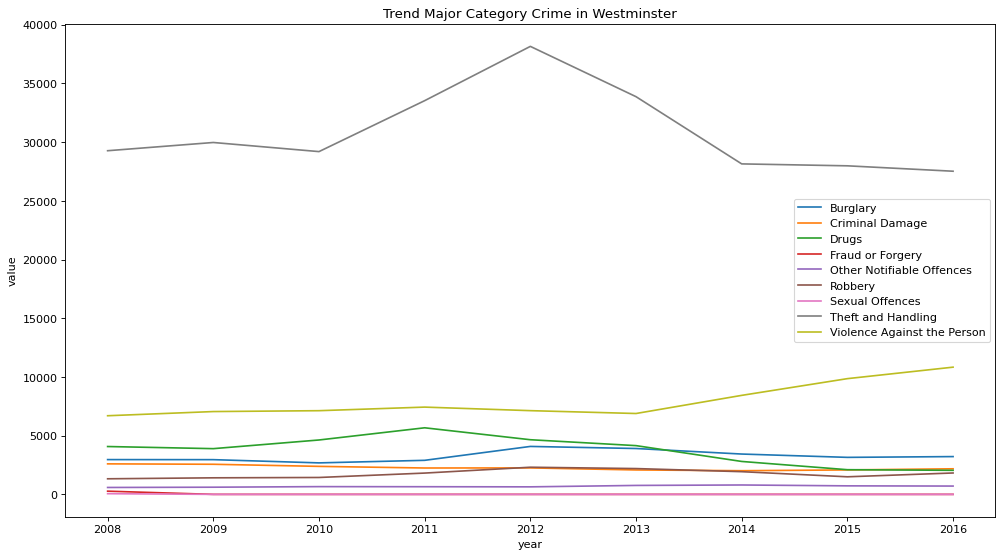

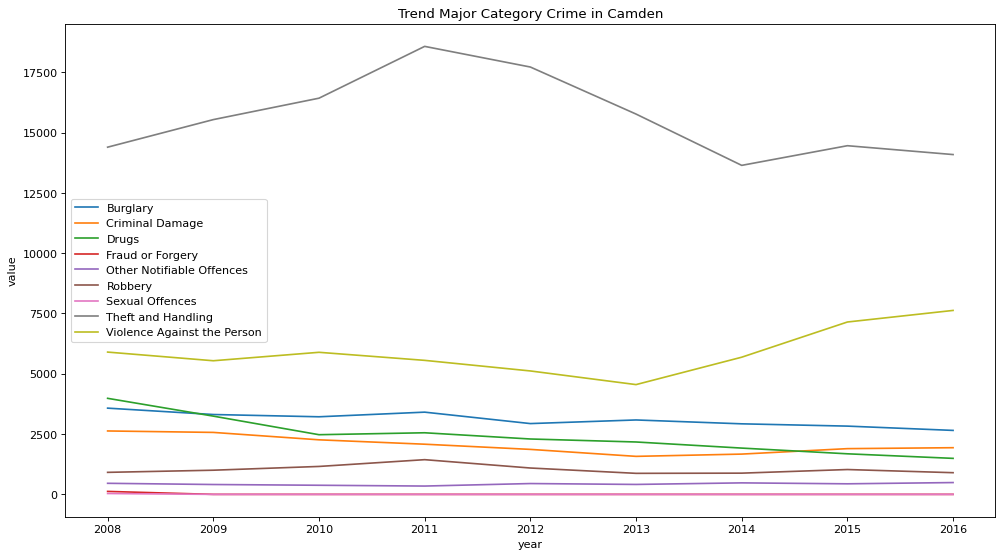

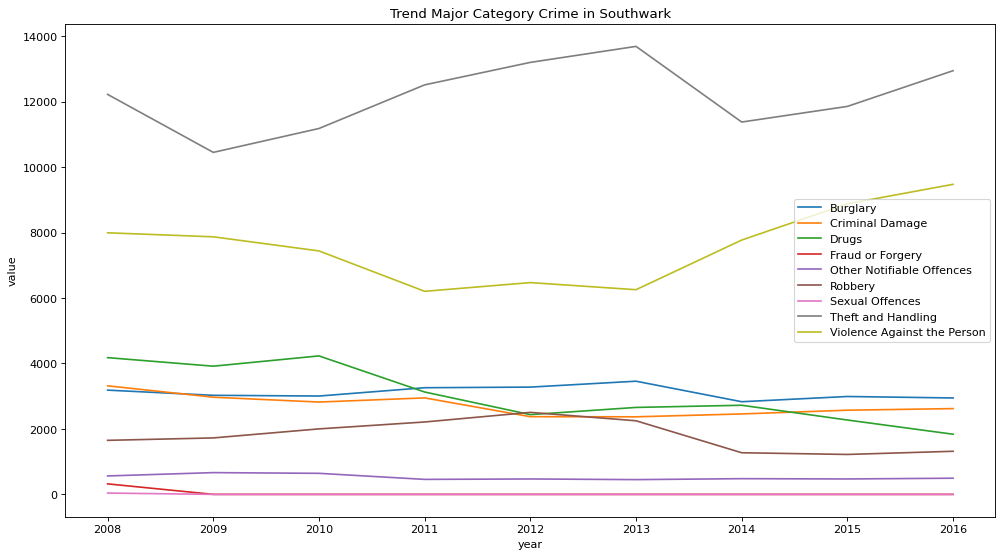

In [ ]:
df2c = pd.DataFrame(df.groupby(["year","borough","major_category"], sort = True)["value"].sum())
df2c.reset_index(inplace=True)
df2c_viz = df2c.query('borough in ["Westminster","Camden","Southwark"]')
for a in ["Westminster","Camden","Southwark"]:
  figure(figsize=(15, 8), dpi=80)
  sns.lineplot(data=df2c_viz[df2c_viz.borough == a], x='year', y='value', hue='major_category')
  title = "Trend Major Category Crime in " + str(a)
  plt.title(title)
  plt.legend(loc = 'best')
  plt.show()


Dari grafik di atas dapat kita lihat bahwa di wilayah Westminster, kategori Theft and Handling mengalami penurunan dari angka 38152 menjadi 28144 (~ -26%) selama 2012 s.d 2014, diikuti dengan penurunan kategori Drugs dari angka 5670 menjadi 2804 (~ -51%) selama 2011 s.d 2014.

Hal yang sama terjadi juga di wilayah Camden dan Southwark dimana kategori Theft and Handling mengalami penurunan pada tahun 2014

Di wilayah Southwark kategori Robbery juga mengalami penurunan di tahun 2014

Sehingga dapat disimpulkan bahwa penurunan jumlah crime secara keseluruhan pada tahun 2014 disebabkan sebagian besar oleh menurunnya kejahatan dalam kategori Theft and Handling di Westminster, Camden, dan Southwark, disusul penurunan kategori Drugs di Westminster dan Robbery di Southwark.

Didapat dari beberapa artikel mengatakan bahwa Westminster merupakan wilayah paling berbahaya di kota London. Tingkat kejahatannya paling tinggi di antara daerah lainnya karena Westminster memiliki populasi paling tinggi dan letaknya yang berada di tengah kota. Westminster merupakan area dimana banyak turis berkunjung dan merupakan commuter area dimana banyak orang pulang pergi setiap hari untuk bekerja.
Data dari internet didapat bahwa Crime Rate per 1000 orang sebesar 195,78 artinya 195 dari 1000 orang mengalami tindak kejahatan.

## Kesimpulan awal 1-2

1. Terdapat seasonal trend setiap 4 tahun sekali dan pada tahun 2014 jumlah kejahatan secara keseluruhan di London menurun secara signifikan
2. Wilayah paling tinggi jumlah kejahatannya adalah Westminster dan merupakan wilayah paling berbahaya di kota London. Berbanding terbalik dengan Westminster, City of London atau Kota London menjadi wilayah paling aman dengan angka kejahatan paling rendah dibanding wilayah lain
3. Kategori kejahatan paling banyak di Westminster adalah Theft and Handling sebesar 64% dari 5 kategori kejahatan tertinggi
4. Penurunan angka kejahatan pada 2014 disebabkan menurunnya jumlah kejahatan kategori Theft and Handling di beberapa wilayah terutama Westminster, Camden, dan Southwark



## 3 - Melihat Major Category dengan Jumlah Kejahatan Terbanyak

In [ ]:
# 3
df3 = pd.DataFrame(df.groupby(["major_category"], sort = True)["value"].sum())
df3.sort_values(by = 'value', ascending=False, inplace=True)
df3.head()

,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765


In [ ]:
df3_viz = df3.head(10)

In [ ]:
df3_viz

,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765
Robbery,258873
Other Notifiable Offences,106349
Fraud or Forgery,5325
Sexual Offences,1273


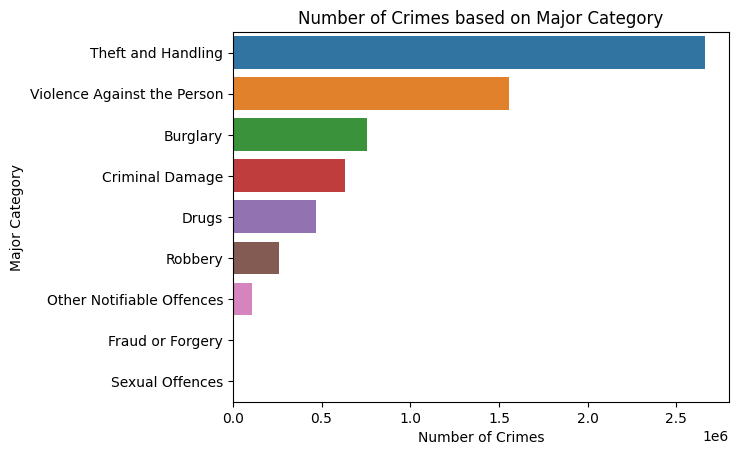

In [ ]:
sns.barplot(df3_viz, x="value", y=df3_viz.index)
plt.xlabel("Number of Crimes")
plt.ylabel("Major Category")
plt.title("Number of Crimes based on Major Category")
plt.show()

Tindak kejahatan paling banyak terjadi di London adalah Theft and Handling dan Violence Against the Person. Selanjutnya mari kita lihat di wilayah apa Theft and Handling paling banyak terjadi

### 3a - Melihat wilayah dengan Jumlah Kejahatan Theft and Handling paling tinggi dan Trend pada 2016

In [ ]:
#wilayah dengan Theft and Handling paling tinggi

df3a = df[df.major_category == 'Theft and Handling']
df3a

df3a_filter = pd.DataFrame(df3a.groupby(["borough"], sort = True)["value"].count())
df3a_filter.sort_values(by = 'value', ascending=False, inplace=True)

df_3a = df3a_filter[:10]
df_3a

,value
borough,
Croydon,176256
Barnet,171180
Ealing,160812
Bromley,156492
Lambeth,150552
Enfield,150444
Wandsworth,146340
Brent,141156
Lewisham,140400


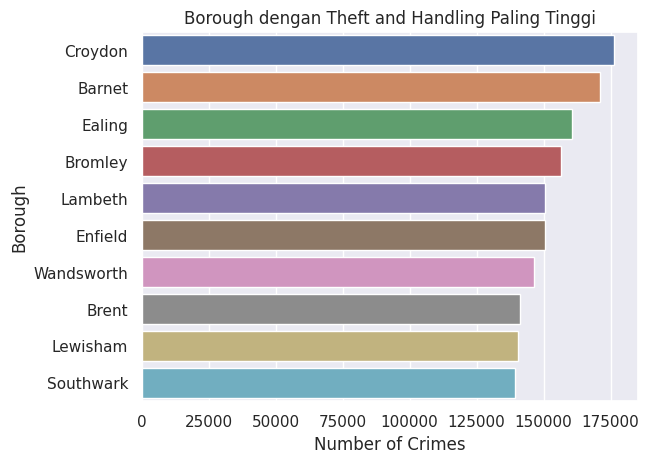

In [ ]:
sns.barplot(df_3a, x="value", y=df_3a.index)
plt.xlabel("Number of Crimes")
plt.ylabel("Borough")
plt.title("Borough dengan Theft and Handling Paling Tinggi")
plt.show()

Daerah dengan kategori tindak kejatahan theft and handling paling tinggi yaitu daerah Croydon, Barnet, Ealing, Bromley, dan Lambeth.

Selanjutnya mari kita lihat trend tindak kejahatan dari major category pada tahun 2016

In [ ]:
# 3a. number of crime based on top 3 major category tahun 2016
df3 = pd.DataFrame(df.groupby(["major_category","year","month"], sort = True)["value"].sum())
df3.sort_values(by = 'value', ascending=False, inplace=True)

In [ ]:
df3.reset_index(inplace=True)

In [ ]:
df3a_theft = df3[(df3['major_category'] == 'Theft and Handling') & (df3['year'] == 2016)].drop(columns = ['major_category','year'])
df3a_burglary = df3[(df3.major_category == 'Burglary') & (df3['year'] == 2016)].drop(columns = ['major_category','year'])
df3a_violence = df3[(df3.major_category == 'Violence Against the Person') & (df3['year'] == 2016)].drop(columns = ['major_category','year'])

In [ ]:
df3a_theft

,month,value
18,10,26303
24,7,25837
25,12,25728
33,11,25384
34,5,25374
39,8,25176
43,9,24999
50,6,24722
83,4,23149
84,3,23117


In [ ]:
df3a_theft.rename(columns={"value": "Theft and Handling"}, inplace=True)
df3a_burglary.rename(columns={"value": "Burglary"}, inplace=True)
df3a_violence.rename(columns={"value": "Violence Against the Person"}, inplace=True)

In [ ]:
df3a_theft.sort_values(by = 'month', ascending = True, inplace = True)
df3a_burglary.sort_values(by = 'month', ascending = True, inplace = True)
df3a_violence.sort_values(by = 'month', ascending = True, inplace = True)

In [ ]:
df3a_theft.reset_index(inplace=True, drop = True)
df3a_burglary.reset_index(inplace=True, drop = True)
df3a_violence.reset_index(inplace=True, drop = True)

In [ ]:
df3_tb = pd.merge(df3a_theft,df3a_burglary,on='month',how='inner')
df3_join = pd.merge(df3_tb,df3a_violence,on='month',how='inner')
df3_join

,month,Theft and Handling,Burglary,Violence Against the Person
0,1,22316,6302,18266
1,2,22028,5841,17642
2,3,23117,5804,18863
3,4,23149,5335,18668
4,5,25374,5404,20639
5,6,24722,5381,20463
6,7,25837,5387,21733
7,8,25176,5406,19762
8,9,24999,5280,19534
9,10,26303,5475,19588


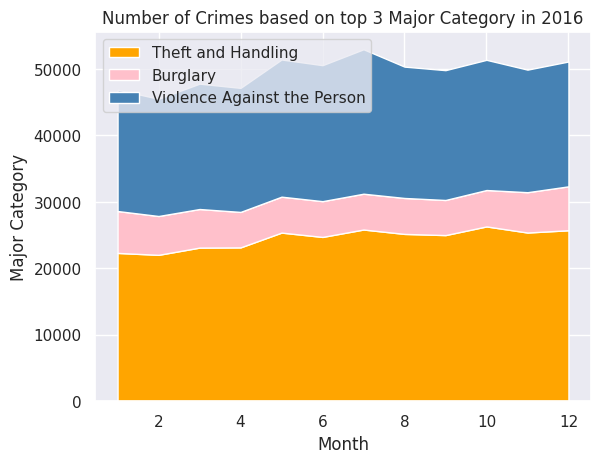

In [ ]:
sns.set_theme()
color_map = ['orange', 'pink', 'steelblue']
plt.stackplot(df3_join.month, df3_join['Theft and Handling'], df3_join['Burglary'], df3_join['Violence Against the Person'],
              labels=['Theft and Handling', 'Burglary', 'Violence Against the Person'],
              colors = color_map)
plt.title("Number of Crimes based on top 3 Major Category in 2016")
plt.xlabel("Month")
plt.ylabel("Major Category")
plt.legend(loc='upper left')
plt.ylabel
plt.show()

Area chart diatas dipilih untuk melihat dari 3 kategori tindak kejahatan yang paling sering terjadi di tahun 2016. Berdasarkan area chart Number of Crimes based on top 3 Major Category in 2016, pada tahun 2016 secara berurutan kejahatan Theft and Handling dan violence against to person adalah kategori kejahatan yang paling sering terjadi di London. Jika dilihat dari setiap bulannya, angka jumlah tindak kejahatan untuk theft and handling, bulgary, dan violence against to person cenderung semakin meningkat.
Kejahatan violence aginst to person di London pada tahun 2016 memiliki trend kenaikan yang cukup fluktuatif jika dibandingkan dengan 2 kategori kejahatan lainnya. Terlihat kenaikan angka jumlah kejatahan yang cukup tajam di bulan Mei dan Juli.

### 3b - Melihat minor category terbanyak

In [ ]:
df3b = pd.DataFrame(df.groupby(["minor_category"], sort = True)["value"].sum())
df3b.sort_values(by = 'value', ascending=False, inplace=True)
df3b_viz = df3b.head(10)

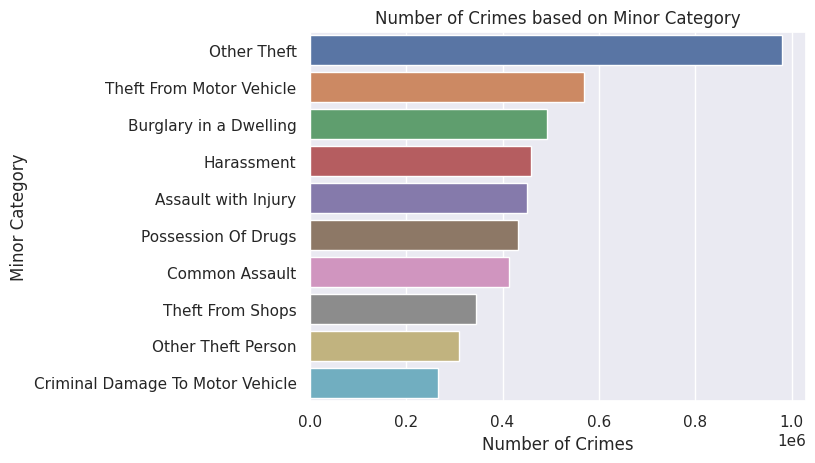

In [ ]:
sns.barplot(df3b_viz, x="value", y=df3b_viz.index)
plt.xlabel("Number of Crimes")
plt.ylabel("Minor Category")
plt.title("Number of Crimes based on Minor Category")
plt.show()

Tindak kejahatan paling banyak terjadi adalah other theft (pencurian lain), theft from motor vehicle (jambret), perampokan rumah, pelecehan, dan penyerangan.

Selanjutnya mari kita lihat minor kategori apa yang paling banyak terjadi di Westminster yang merupakan wilayah dengan tindak kejahatan tertinggi di London

In [ ]:
westminster_crimes = df[df.borough == 'Westminster'].groupby('minor_category')['value'].sum().reset_index()
westminster_crimes.sort_values(by = 'value', ascending=False, inplace=True)

In [ ]:
westminster_dict = dict(zip(westminster_crimes['minor_category'], westminster_crimes['value']))

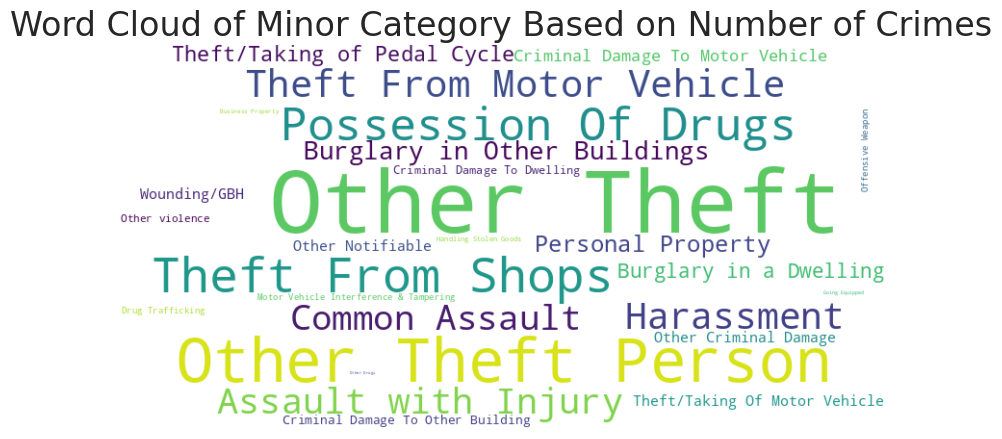

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(westminster_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Minor Category Based on Number of Crimes', fontsize=24)
plt.show()

Berdasarkan wordcloud di atas, dapat dilihat bahwa minor category di Westminster paling banyak adalah Other Theft, disusul oleh Other Theft Person, Possession of Drugs, dan Theft From Shops.

## 4 - Melihat Hubungan antara Jumlah kejahatan dengan Jumlah kantor polisi pada suatu wilayah

In [ ]:
df6 = pd.DataFrame(df.groupby(["borough"], sort = True).agg({'lsoa_code': 'nunique'}))
df6.sort_values(by='lsoa_code', ascending=False, inplace = True)
df6

,lsoa_code
borough,
Croydon,220
Barnet,211
Bromley,197
Ealing,196
Enfield,183
Wandsworth,179
Lambeth,178
Brent,173
Lewisham,169


In [ ]:
police_crime_join = pd.merge(df2,df6,on='borough',how='inner')
police_crime_join

,value,lsoa_code
borough,,
Westminster,455028,128
Lambeth,292178,178
Southwark,278809,166
Camden,275147,133
Newham,262024,164
Croydon,260294,220
Ealing,251562,196
Islington,230286,123
Tower Hamlets,228613,144


In [ ]:
police_crime_join.rename(
    columns={"value": "total_crime", "lsoa_code": "total_police"}, inplace=True
)

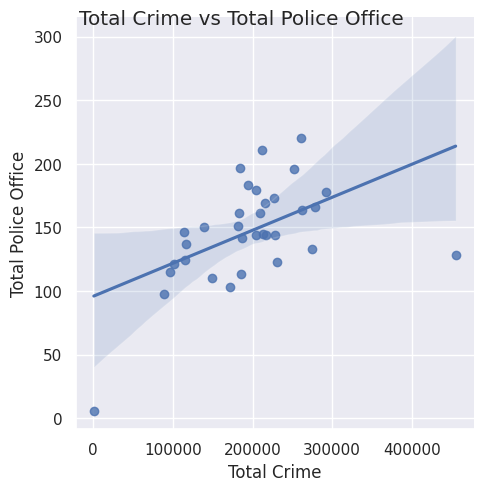

In [ ]:
ax = sns.lmplot(x="total_crime", y="total_police", data = police_crime_join).fig.suptitle("Total Crime vs Total Police Office")

plt.xlabel("Total Crime")
plt.ylabel("Total Police Office")
plt.show()

Dari grafik di atas menunjukkan terdapat korelasi positif antara total crime dengan total police office yang dapat diinterpretasikan demikian: Semakin banyak tingkat kejahatan di suatu daerah, maka semakin banyak pula kantor polisi di daerah tersebut

## 5 - Melihat level of crime secara keseluruhan dalam bentuk Folium Maps

In [ ]:
import folium.plugins as plugins
import folium

In [ ]:
df5 = df.copy()
df5

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [ ]:
import folium

df5_viz = pd.DataFrame(df5[df5.year == 2016].groupby(['borough'])['value'].sum())

df5_viz.reset_index(inplace=True)
df5_viz

,borough,value
0,Barking and Dagenham,16741
1,Barnet,24684
2,Bexley,12840
3,Brent,26693
4,Bromley,20164
5,Camden,29183
6,City of London,178
7,Croydon,28712
8,Ealing,27127
9,Enfield,22485


In [ ]:
df5_viz.sort_values(by = 'value', ascending = False)

,borough,value
32,Westminster,48330
21,Lambeth,34071
27,Southwark,31636
24,Newham,30090
29,Tower Hamlets,29253
5,Camden,29183
7,Croydon,28712
11,Hackney,28265
13,Haringey,27174
8,Ealing,27127


In [ ]:
map_center = [51.509865, -0.118092]  # London coordinates
crime_map = folium.Map(location=map_center, zoom_start=10, tiles="cartodb positron")

london_borough_url = ('https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson')

folium.Choropleth(
    geo_data=london_borough_url,
    data=df5_viz,
    columns=["borough", "value"],
    key_on="feature.properties.name",
    fill_color="RdYlGn_r",
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color="white",
    legend_name="Number of Crimes Level",
).add_to(crime_map)
folium.LayerControl().add_to(crime_map)
# Add a title to the map
title_html = """
    <h3 align="center" style="font-size:16px"><b>London Borough Crime Map</b></h3>
    """
crime_map.get_root().html.add_child(folium.Element(title_html))
crime_map

Pada peta di atas dapat dilihat bahwa semakin dekat dengan pusat kota London maka jumlah kejahatan semakin tinggi walaupun menariknya di Kota London sendiri jumlah kejahatannya sangat rendah mungkin dikarenakan populasi warganya yang tidak sebanyak wilayah lain

## Kesimpulan

1. Data crime di London menunjukkan trend musiman yang naik turun setiap 4 tahun sekali dengan Westminster menjadi wilayah yang jumlah kejahatannya paling tinggi sehingga tak mengherankan dikenal sebagai wilayah paling berbahaya di London. Sedangkan City of London memiliki jumlah kejahatan paling rendah. Perlu digarisbawahi bahwa jumlah kejahatan (Total Crime) tidak sama dengan tingkat kejahatan (Crime Rate), yang dianalisis dalam studi kasus ini adalah jumlah kejahatan.

2. Kategori kejahatan paling banyak terjadi adalah Theft and Handling yaitu kategori kejahatan yang umumnya mencakup tindakan terkait pencurian atau menangani barang curian secara melanggar hukum. Kategori ini mencakup berbagai aktivitas kriminal terkait pencurian dan pemilikan barang curian, seperti membantu menjual barang hasil curian, menghilangkan barang bukti curian, dan lain sebagainya.


3. Penurunan trend pada tahun 2014 terjadi disebabkan menurunnya jumlah Theft and Handling di beberapa wilayah yang menyumbang jumlah kejahatan terbanyak secara keseluruhan seperti Westminster, Camden, dan Southwark.

4. Sedangkan peningkatan jumlah kejahatan di London pada tahun 2016 disebabkan karena meningkatnya kejahatan Theft and Handling dan Violence Against to Person. Violence agains to person merupakan kategori kejahatan yang umumnya mencakup tindakan kriminal yang melibatkan penggunaan kekerasan atau ancaman kekerasan terhadap individu/seseorang.

5. Dalam kategori kejahatan yang lebih detail, yang paling banyak terjadi adalah other theft (pencurian lain), theft from motor vehicle (jambret), perampokan rumah, pelecehan, dan penyerangan.

6. Dari grafik di atas menunjukkan terdapat korelasi positif antara total crime dengan total police office yang dapat diinterpretasikan demikian: Semakin banyak jumlah kejahatan di suatu daerah, maka semakin banyak pula kantor polisi di daerah tersebut.

7. Pada peta di atas dapat dilihat bahwa semakin dekat dengan pusat kota London maka jumlah kejahatan semakin tinggi walaupun menariknya di Kota London sendiri jumlah kejahatannya sangat rendah mungkin dikarenakan populasi warganya yang tidak sebanyak wilayah lain